<a href="https://colab.research.google.com/github/uday0097/MLProjects/blob/main/logisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [13]:
#Read the data
data = pd.read_csv('/content/F18cars (1).csv')

In [14]:
data.head()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,Mazda RX4,21.0,6,160.0,110.0,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110.0,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93.0,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110.0,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175.0,3.15,3.440,17.02,0,0,3,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Model     32 non-null     object 
 1   MPG       32 non-null     float64
 2   Cylinder  32 non-null     int64  
 3   Disp      29 non-null     float64
 4   HP        29 non-null     float64
 5   Drat      32 non-null     float64
 6   Wt        32 non-null     float64
 7   Qsec      32 non-null     float64
 8   VS        32 non-null     int64  
 9   AM        32 non-null     int64  
 10  Gear      32 non-null     int64  
 11  Carb      32 non-null     int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.1+ KB


In [6]:
data.describe()

,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
count,32.000000,32.000000,29.000000,29.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,229.789655,145.206897,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,129.299092,71.434975,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.300000,95.000000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,167.600000,113.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,350.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [7]:
data.isnull()

,Model,MPG,Cylinder,Disp,HP,Drat,Wt,Qsec,VS,AM,Gear,Carb
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,True,False,False,False,False,False,False,False


In [15]:
data.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        3
HP          3
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [17]:
data=data.fillna(0)

In [18]:
data.isnull().sum()

Model       0
MPG         0
Cylinder    0
Disp        0
HP          0
Drat        0
Wt          0
Qsec        0
VS          0
AM          0
Gear        0
Carb        0
dtype: int64

In [11]:
data.Gear.value_counts()

Gear
3    15
4    12
5     5
Name: count, dtype: int64

In [12]:
data.shape

(32, 12)

<Axes: >

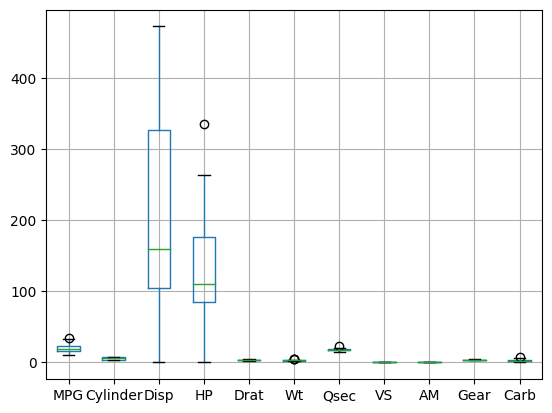

In [19]:
data.boxplot()

In [20]:
X=data['AM']

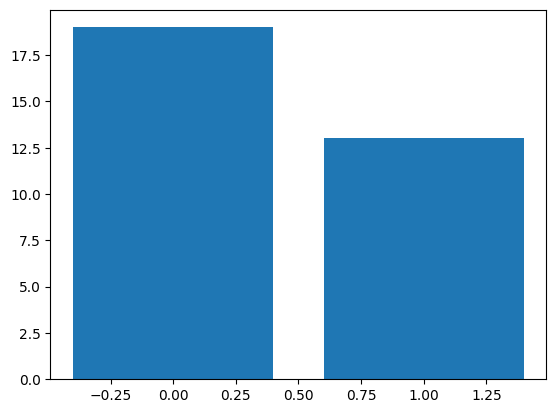

In [21]:
counts=data['AM'].value_counts()
plt.bar(counts.index,counts.values)
plt.show()

In [22]:
import seaborn as sb

<ipython-input-23-f2f1fd10c622>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.countplot(x='AM',data=data,palette='RdBu_r') # 0 manual 1 automate


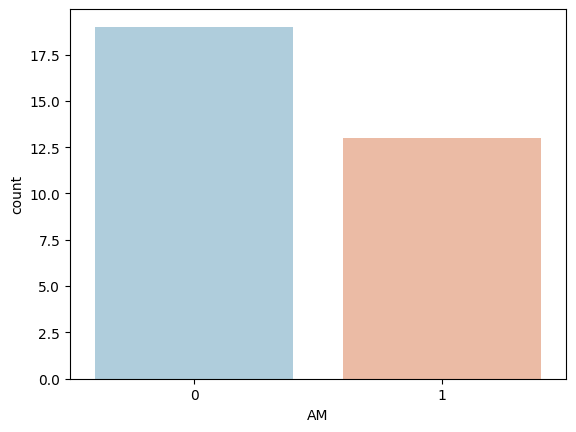

In [23]:
sb.countplot(x='AM',data=data,palette='RdBu_r') # 0 manual 1 automate
plt.show()

<Axes: xlabel='AM', ylabel='count'>

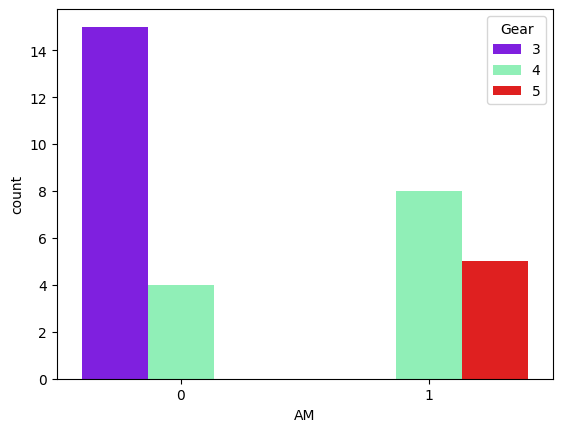

In [24]:
sb.countplot(x='AM',hue='Gear',data=data,palette='rainbow') #


In [25]:
data.columns

Index(['Model ', 'MPG', 'Cylinder', 'Disp', 'HP', 'Drat', 'Wt', 'Qsec', 'VS',
       'AM', 'Gear', 'Carb'],
      dtype='object')

In [26]:
data.iloc[5:10,[2,3]]

,Cylinder,Disp
5,6,225.0
6,8,360.0
7,4,146.7
8,4,140.8
9,6,0.0


In [27]:
y=data.AM
X=data.loc[:,['MPG','HP','Wt']]

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
y_predict=model.predict(X_test)

In [35]:
y_predict

array([0, 0, 0, 1, 0, 0, 1])

In [36]:
y_test

11    0
22    0
10    0
2     1
16    0
14    0
28    1
Name: AM, dtype: int64

In [37]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [38]:
accuracy_score(y_test,y_predict)

1.0

In [39]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [40]:
confusion_matrix(y_test,y_predict)

array([[5, 0],
       [0, 2]])

In [ ]:
3scikit learn
import sklearn